# Notebook: écoulement potentiel autour d'un cylindre
**Marc Buffat** département mécanique, Univerisité Lyon 1
![MagnusForce](MagnusForce.png)


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

## Modèle fluide parfait incompressible en 2D
![cylind.png](cylind.png)

la solution se calcule avec la fonction de courant $\Psi(x,y)$

$$
\overrightarrow{U}=\left[\begin{array}{c}
\,\frac{\partial\Psi}{\partial y}\\
-\frac{\partial\Psi}{\partial x}
\end{array}\right]
$$

 solution de l'équation de Laplace :
 
$$ -\Delta \Psi = 0 $$

Les conditions aux limites associées sont :

$$\Psi(r=\infty)=yU_{0}\,\,,\,\,\,\Psi(r=R)=cste $$

En coordonnées polaires, l'équation s'écrit:

$$ \frac{1}{r}\frac{\partial }{\partial r} \left(r \frac{\partial \Psi}{\partial r} \right)
 + \frac{1}{r^2}\frac{\partial^2 \Psi}{\partial r^2} = 0 $$
 
 avec 
 
 $$ U_r = \frac{1}{r} \frac{\partial \Psi}{\partial \theta} \mbox{ et }
    U_\theta =  -\frac{\partial \Psi}{\partial r} $$  
    
 et 
 
 $$ U_x = U_r \cos\theta - U_\theta \sin \theta \mbox{ et } U_y = U_r \sin\theta + U_\theta \cos \theta$$
 
La solution analytique peut être obtenue avec la théorie des fonctions conformes comme une combinaison linéaire de solutions élémentaires du type :

 1. solution uniforme
 2. source/puit
 3. vortex
 4. dipôle / doublet

## Solutions élémentaires

### champ uniforme vitesse constante $U_0$

$$\Psi_1 = U_0 y$$

d'où le champ de vitesse 
$$
\overrightarrow{U_1}=\left[\begin{array}{c}
U_x=U_0\\
U_y=0
\end{array}\right]
$$

### source d'intensité C à l'origine

$$\Psi_2 = C \theta$$

d'où le champ de vitesse 

$$
\overrightarrow{U_2}=\left[\begin{array}{c}
U_r=\frac{C}{2\pi r}\\
U_\theta=0
\end{array}\right]
$$

Le flux de vitesse à travers un cercle de rayon r est constant et vaut :

$$ \int_0^{2\pi} U_r  r d\theta = C $$

### vortex d'intensité $\Gamma$  à l'origine

$$\Psi_3 = \frac{\Gamma}{2\pi} \ln r$$

d'où le champ de vitesse 

$$
\overrightarrow{U_3}=\left[\begin{array}{c}
U_r=0\\
U_\theta=\frac{\Gamma}{2\pi r}
\end{array}\right]
$$

La circulation de vitesse sur un cercle de rayon r est constante et vaut:

$$ \int_0^{2\pi} U_\theta  r d\theta = \Gamma $$

### doublet à l'origine d'intensité $\kappa$

$$\Psi_4 = \frac{1}{2\pi}\frac{\kappa}{r} \sin\theta$$

d'où le champ de vitesse 

$$
\overrightarrow{U_4}=\left[\begin{array}{c}
U_r=\frac{1}{2\pi}\frac{\kappa}{r^2} \cos\theta\\
U_\theta= \frac{1}{2\pi}\frac{\kappa}{r^2} \sin\theta
\end{array}\right]
$$


## Trace des solutions élémentaires
 - calcul des solutions élémentaires avec des fonctions Python
 - tracer des solutions avec matplotlib
 - attention aux singularités (à l'origine)

In [2]:
# prise en compte de singularité
def Filtre(U0,U,V):
    '''filtrage du champ vitesse >U0: attention U,V modifié'''
    nx,ny = U.shape
    for i in range(nx):
        for j in range(ny):
            um = np.sqrt(U[i,j]**2 + V[i,j]**2)
            if um>U0:
                U[i,j] = U[i,j]*U0/um
                V[i,j] = V[i,j]*U0/um
    return

In [3]:
# domaine de calcul et maillage (grille) pour le calcul de psi et de la vitesse
L = 2
N = 100
# on elimine le pt singulier x=0,y=0
x = np.linspace(-L,L,N)
y = np.linspace(-L/2,L/2,N)
# pour les lignes de courant psi
X, Y = np.meshgrid(x, y)
# et le champ de vitesse U
XX,YY = np.meshgrid(x[::4],y[::4])

### champ uniforme 

$$
\Psi_1 = U_0 y \mbox{ et }
\overrightarrow{U_1}=\left[\begin{array}{c}
U_x=U_0\\
U_y=0
\end{array}\right]
$$

In [4]:
def Psi_uniforme(U0,x,y):
    return U0*y
def Vit_uniforme(U0,x,y):
    return U0,0

In [5]:
U0   = 1.0
Lpsi = np.linspace(-U0*L/2,U0*L/2,21)
Psi1 = Psi_uniforme(U0,X,Y)
U1,V1= Vit_uniforme(U0,XX,YY)      

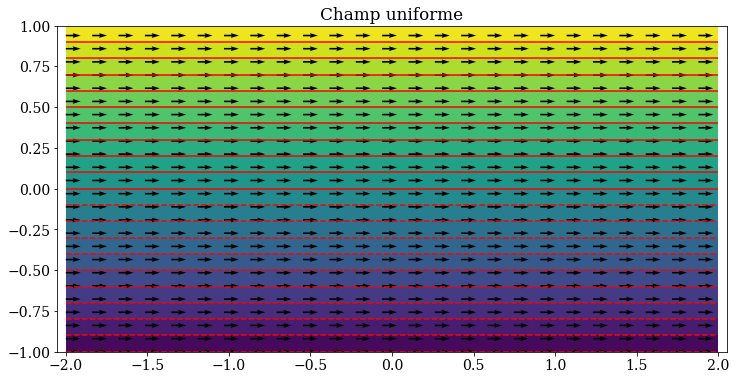

In [6]:
# tracer
fig, ax = plt.subplots(figsize=(12,6))
ax.contourf(X,Y,Psi1,levels=21)
ax.contour(X,Y,Psi1,levels=Lpsi,colors='r')
ax.quiver(XX,YY,U1,V1)
plt.axis('equal')
plt.title("Champ uniforme");

### Source / puit

$$
\Psi_2 = C \theta
\mbox{ et }
\overrightarrow{U_2}=\left[\begin{array}{c}
U_r=\frac{C}{2\pi r}\\
U_\theta=0
\end{array}\right]
$$

In [7]:
def Psi_source(C,x,y):
    return C*np.arctan2(x,y)
def Vit_source(C,x,y):
    r2 = x**2+y**2
    u = C*2*np.pi*x/r2
    v = C*2*np.pi*y/r2
    return u,v

In [8]:
C = 0.1
Psi2  = Psi_source(C,X,Y)
U2,V2 = Vit_source(C,XX,YY)
Filtre(U0,U2,V2)

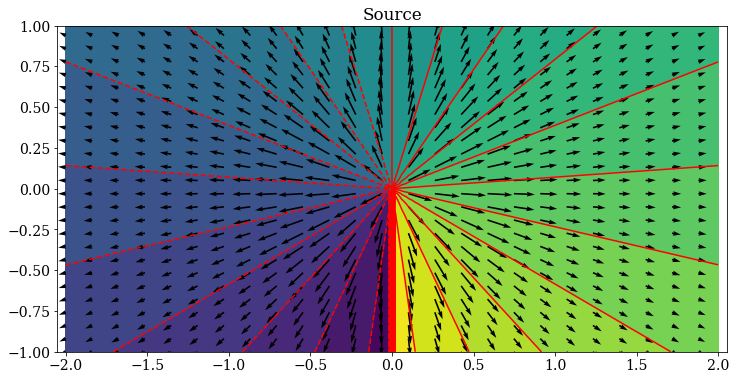

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi2,levels=21,colors='r')
ax.contourf(X,Y,Psi2,levels=21)
ax.quiver(XX,YY,U2,V2)
plt.axis('equal')
plt.title("Source");

### Vortex

$$
\Psi_3 = \frac{\Gamma}{2\pi} \ln r
\mbox{ et }
\overrightarrow{U_3}=\left[\begin{array}{c}
U_r=0\\
U_\theta=\frac{\Gamma}{2\pi r}
\end{array}\right]
$$

In [10]:
def Psi_vortex(G,x,y):
    r = np.sqrt(x**2+y**2)
    return (G/(2*np.pi))*np.log(r)
def Vit_vortex(G,x,y):
    r2 = x**2 + y**2
    u =  (G/(2*np.pi))*y/r2
    v = -(G/(2*np.pi))*x/r2
    return u,v

In [11]:
G = 2.0
Psi3  = Psi_vortex(G,X,Y)
U3,V3 = Vit_vortex(G,XX,YY)
Filtre(U0,U3,V3)

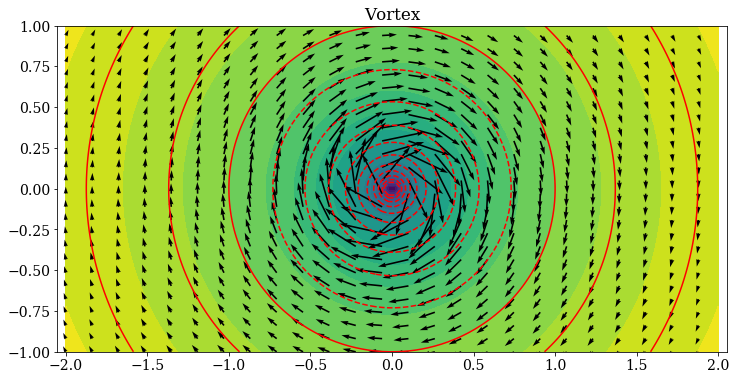

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi3,levels=Lpsi,colors='r')
ax.contourf(X,Y,Psi3,levels=21)
ax.quiver(XX,YY,U3,V3)
plt.axis('equal')
plt.title("Vortex");

### Doublet
$$
\Psi_4 = \frac{1}{2\pi}\frac{\kappa}{r} \sin\theta
\mbox{ et }
\overrightarrow{U_4}=\left[\begin{array}{c}
U_r=\frac{1}{2\pi}\frac{\kappa}{r^2} \cos\theta\\
U_\theta= \frac{1}{2\pi}\frac{\kappa}{r^2} \sin\theta
\end{array}\right]
$$

In [13]:
def Psi_doublet(K,x,y):
    r2  = x**2+y**2
    val = (K/(2*np.pi))*y/r2
    return val
def Vit_doublet(K,x,y):
    r4  = (x**2+y**2)**2
    u =  (K/(2*np.pi))*(x**2-y**2)/r4
    v =  (K/(2*np.pi))*2*x*y/r4
    return u,v

In [14]:
K = 2.0
Psi4  = Psi_doublet(K,X,Y)
U4,V4 = Vit_doublet(K,XX,YY)
Filtre(2*U0,U4,V4)

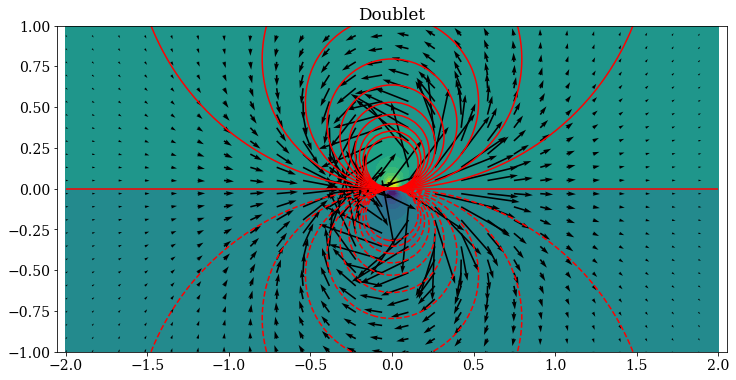

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi4,levels=Lpsi,colors='r')
ax.contourf(X,Y,Psi4,levels=21)
ax.quiver(XX,YY,U4,V4)
plt.axis('equal')
plt.title("Doublet");

### combinaison linéaire de 2 solutions
 - Ecoulement autour d'un cylindre immobile

In [16]:
Psi = Psi1 - Psi4
U   = U1 - U4
V   = V1 - V4

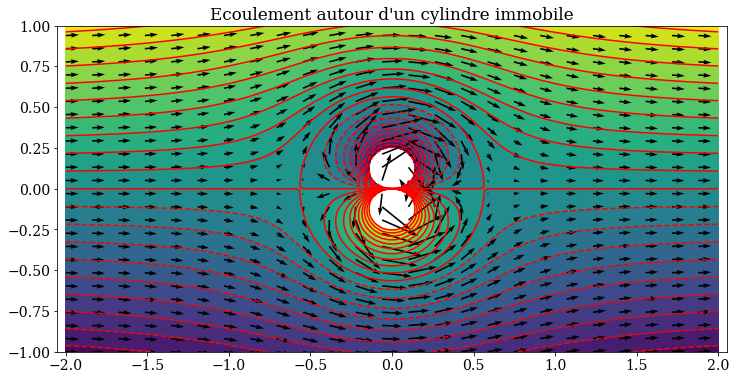

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi,levels=Lpsi,colors='r')
ax.contourf(X,Y,Psi,levels=Lpsi)
ax.quiver(XX,YY,U,V)
plt.axis('equal')
plt.title("Ecoulement autour d'un cylindre immobile");

### combinaison linéaire de 3 solutions
- Ecoulement autour d'un cylindre immobile en rotation

In [18]:
Psi = Psi1 - Psi4 + Psi3
U   = U1 - U4 + U3
V   = V1 - V4 + V3

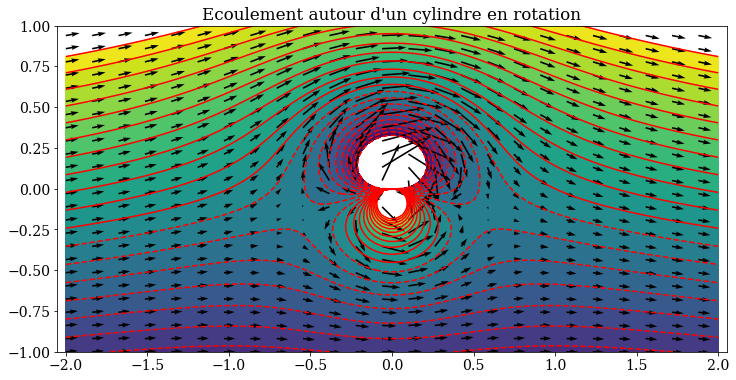

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi,levels=Lpsi,colors='r')
ax.contourf(X,Y,Psi,levels=Lpsi)
ax.quiver(XX,YY,U,V)
plt.axis('equal')
plt.title("Ecoulement autour d'un cylindre en rotation");

## Ecoulement autour d'un cylindre de rayon R fixé

- cas du cylindre immobile

- détermination de la bonne combinaison linéaire 

In [20]:
R = 0.5
# condition d'arret
u0,v0 = Vit_doublet(1.0,R,0)
alpha = -U0/u0
print("alpha=",alpha)

alpha= -1.5707963267948966


In [21]:
Psi5   = Psi_doublet(alpha,X,Y)
U5, V5 = Vit_doublet(alpha,XX,YY)
Psi = Psi1 + Psi5
U   = U1 + U5
V   = V1 + V5
Filtre(2*U0,U,V)

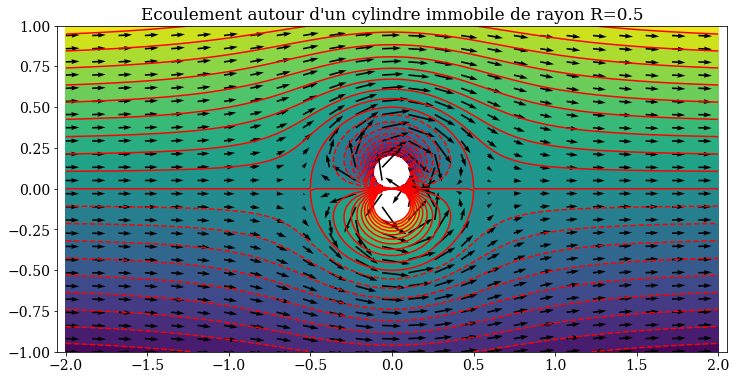

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi,levels=Lpsi,colors='r')
ax.contourf(X,Y,Psi,levels=Lpsi)
ax.quiver(XX,YY,U,V)
plt.axis('equal')
plt.title("Ecoulement autour d'un cylindre immobile de rayon R={}".format(R));

### Analyse de l'écoulement
 - solution sur le cylindre (vitesse et $\Psi$)
 - calcul de la répartition de pression sur le cylindre
 - bilan des forces
    - trainée
    - portance

In [23]:
Nc = 101
#Theta = np.linspace(0,2*np.pi,Nc)
Theta = np.linspace(-np.pi,np.pi,Nc)
Xc = R*np.cos(Theta)
Yc = R*np.sin(Theta)
# calcul solution sur le cylindre
Psic1 = Psi_uniforme(U0,Xc,Yc)
Psic2 = Psi_doublet(alpha,Xc,Yc)
Psic  = Psic1 + Psic2
Uc1,Vc1 = Vit_uniforme(U0,Xc,Yc)
Uc2,Vc2 = Vit_doublet(alpha,Xc,Yc)
Uc = Uc1 + Uc2
Vc = Vc1 + Vc2
Ut = (-Uc*Yc + Vc*Xc)/R
Un = ( Uc*Xc + Vc*Yc)/R
# calcul pression
rho = 1.0
Pr  = 0.5*rho*(U0**2 - Uc**2 - Vc**2)

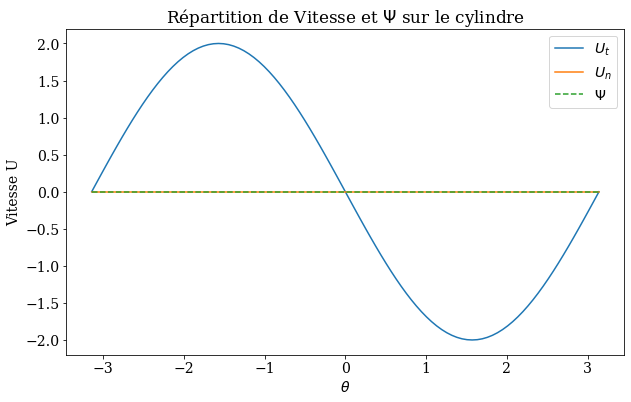

In [24]:
plt.figure(figsize=(10,6))
plt.plot(Theta,Ut,label="$U_t$")
plt.plot(Theta,Un,label="$U_n$")
plt.plot(Theta,Psic,'--',label="$\Psi$")
plt.legend()
plt.xlabel("$\\theta$")
plt.ylabel("Vitesse U")
plt.title("Répartition de Vitesse et $\Psi$ sur le cylindre");

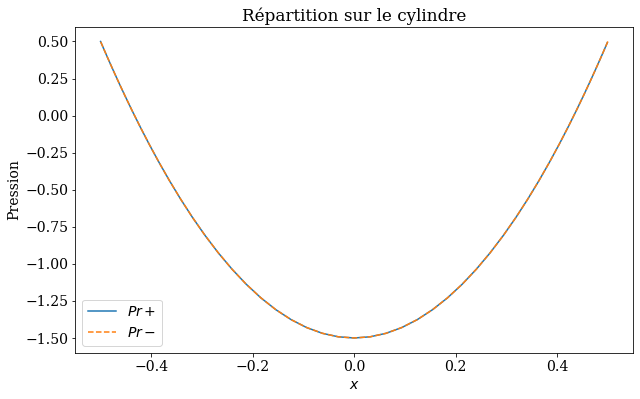

In [25]:
plt.figure(figsize=(10,6))
plt.plot(Xc[:Nc//2],Pr[:Nc//2],label="$Pr+$")
plt.plot(Xc[Nc//2:],Pr[Nc//2:],'--',label="$Pr-$")
plt.xlabel("$x$")
plt.ylabel("Pression")
plt.legend()
plt.title("Répartition sur le cylindre");

## Cas du cylindre en rotation

- cas du cylindre rayon R

- détermination de la bonne combinaison linéaire 

In [26]:
# on fixe le point d'arret
theta0 = -np.pi/4
x0 = R*np.cos(theta0)
y0 = R*np.sin(theta0)
u0,v0 = Vit_doublet(alpha,x0,y0)
u0  = u0 + U0
ut0 = (-u0*y0 + v0*x0)/R
# calcul vitesse du vortex
u1,v1 = Vit_vortex(1.0,x0,y0)
ut1 = (-u1*y0 + v1*x0)/R
beta = -ut0/ut1
print("beta=",beta,ut0*2*np.pi*R)

beta= 4.442882938158365 4.442882938158366


In [27]:
Psi6   = Psi_vortex(beta,X,Y)
U6, V6 = Vit_vortex(beta,XX,YY)
Psi = Psi1 + Psi5 + Psi6
U   = U1 + U5 + U6
V   = V1 + V5 + V6
Filtre(2*U0,U,V)
psi0 = Psi_uniforme(U0,x0,y0) + Psi_doublet(alpha,x0,y0) + Psi_vortex(beta,x0,y0)
print("Psi sur le cylindre ",psi0)
Lpsi0=np.linspace(psi0-U0*L/2,psi0+U0*L/2,21)

Psi sur le cylindre  -0.49012907173427345


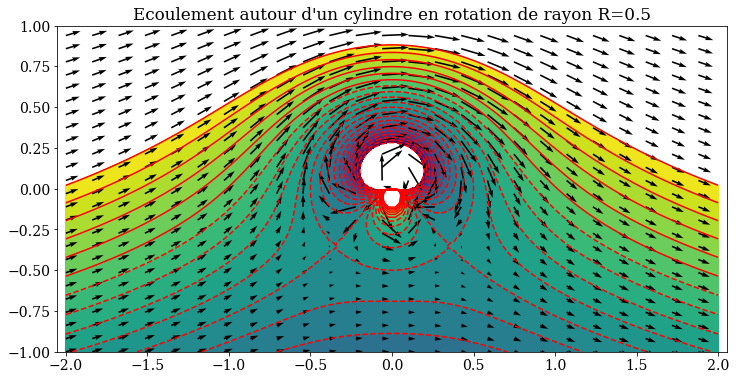

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
ax.contour( X,Y,Psi,levels=Lpsi0,colors='r')
ax.contourf(X,Y,Psi,levels=Lpsi0)
ax.quiver(XX,YY,U,V)
plt.axis('equal')
plt.title("Ecoulement autour d'un cylindre en rotation de rayon R={}".format(R));

### Analyse de l'écoulement
 - calcul de la solution vitesse et $\Psi$ sur le cylindre
 - calcul de la répartition de pression sur le cylindre
 - bilan des forces
    - trainée
    - portance

In [29]:
# solution sur le cylindre
Psic3 = Psi_vortex(alpha,Xc,Yc)
Psic  = Psic1 + Psic2 + Psic3
Uc3,Vc3 = Vit_vortex(beta,Xc,Yc)
Uc = Uc1 + Uc2 + Uc3
Vc = Vc1 + Vc2 + Vc3
Ut = (-Uc*Yc + Vc*Xc)/R
Un = ( Uc*Xc + Vc*Yc)/R
Pr  = 0.5*rho*(U0**2 - Uc**2 - Vc**2)

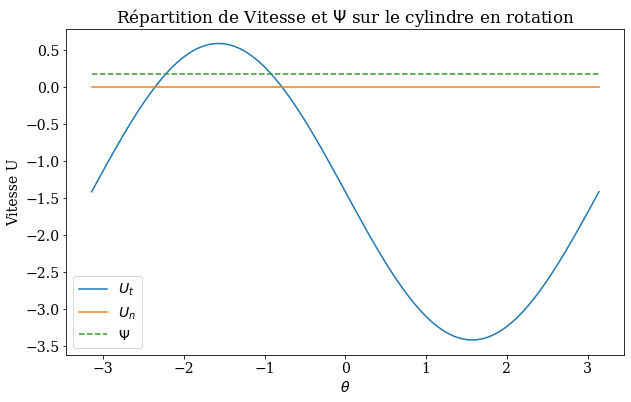

In [30]:
plt.figure(figsize=(10,6))
plt.plot(Theta,Ut,label="$U_t$")
plt.plot(Theta,Un,label="$U_n$")
plt.plot(Theta,Psic,'--',label="$\Psi$")
plt.legend()
plt.xlabel("$\\theta$")
plt.ylabel("Vitesse U")
plt.title("Répartition de Vitesse et $\Psi$ sur le cylindre en rotation");

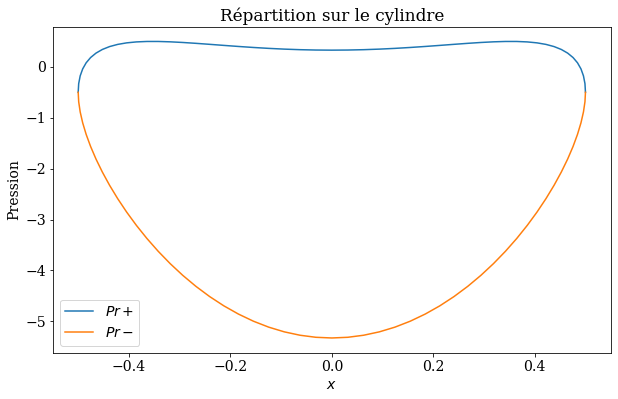

In [31]:
plt.figure(figsize=(10,6))
plt.plot(Xc[:Nc//2+1],Pr[:Nc//2+1],label="$Pr+$")
plt.plot(Xc[Nc//2:],Pr[Nc//2:],label="$Pr-$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Pression")
plt.title("Répartition sur le cylindre");

In [32]:
# calcul des forces de pression
Fp =  np.trapz(Pr[:Nc//2+1],Xc[:Nc//2+1])
Fm =  np.trapz(Pr[Nc//2:],  Xc[Nc//2:])
print("portance=",Fp+Fm,"beta=",beta)

portance= 4.439960215340383 beta= 4.442882938158365


## FIN